# Customer Churn Analysis

**OBJECTIVE:** Examining customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

**Identifying Type:** Target Variable is classic example of Binary Classification. Hence Logistic Regression algorithm best suits. However we will apply classification algorithms such as DecisionTree Classifier.

### IMPORTING LIBRARIES

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

### LOADING DATA

In [178]:
# Loading data and converting to DataFrame
churn_data= pd.read_csv("Telecom_churn_data.csv")

df= pd.DataFrame(data= churn_data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [179]:
# lets check the column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [180]:
# Lets know how big our data is.
df.shape

(7043, 21)

In [181]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Except Senior citizen, tenure and MonthlyCharges rest all columns are objects or categorical.  
Total charges should be ideally numerical, However we will convert it to float.

In [182]:
# Converting TotalCharges to Numeric values
# 'coerce'- invalid parsing will be set as Nan
df.TotalCharges= pd.to_numeric(df.TotalCharges,errors='coerce')

In [183]:
# Our target variable is categorical and majority is 'NO'
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We have a huge dataset with mixed variables both numerical and categorical. Lets evaluate our columns further.  
However columns like customerID is irrelevant, hence its better delete the column.

In [184]:
# Lets check the statistical info for numerical data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [185]:
# information of categorical value.
df.describe(include=['object', 'bool'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,0362-ZBZWJ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


There is no missing values identified in both numeric and categoric.  

In [186]:
# Checking the values in each column
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [187]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [188]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [189]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [190]:
df['tenure'].max()

72

we have tenure from 1-72 years. lets convert it to categorical for easily understanding data.

In [191]:
# Grouping the tenure bins
lab= ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
df['tenure_category']= pd.cut(df.tenure, range(1,80,12), right=False, labels= lab)
df['tenure_category'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_category, dtype: int64

In [192]:
# Dropping the irrelevnt column CustomerID and tenure
df.drop(columns=['customerID','tenure'], axis=1,inplace=True)

In [193]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [194]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [195]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

### EDA and VISUALIZATIONS

In [196]:
# Checking for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_category     11
dtype: int64

We have 11 null values in TotalCharges column.

In [197]:
# Since missing values are very less, Lets drop the Nan values.
df.dropna(how='any', inplace=True)

**VISUALIZATIONS**

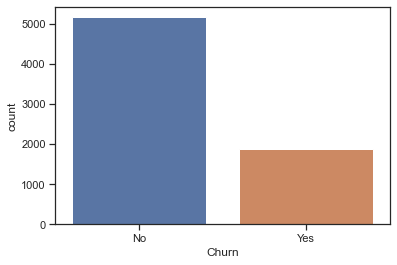

In [200]:
# Plotting the target variable.
sns.countplot(x=df['Churn'])
plt.show()

Churners are more than 70%.  
lets evaluate the reasons.

<AxesSubplot:>

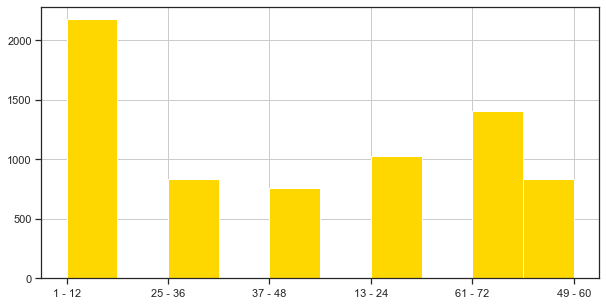

In [201]:
# Distribution of Tenure
df['tenure_category'].hist(figsize=(10,5), color='gold')

tenure ranges from 0 to 70 plus. 

<AxesSubplot:>

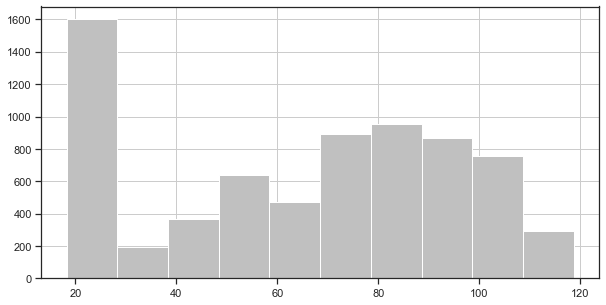

In [202]:
df['MonthlyCharges'].hist(figsize=(10,5), color='silver')

monthly charges ranges from 18 to 118 approximately.  
And majority opted lowest monyhly plans.

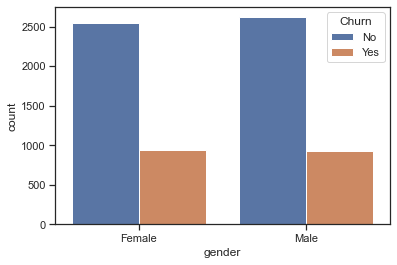

In [209]:
# Churn in the basis of Gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()

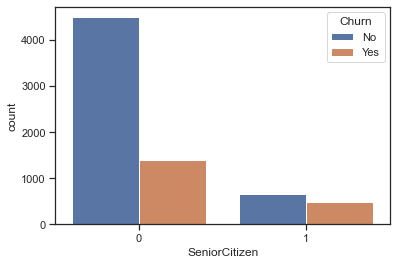

In [208]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.show()

There are chances senior citizen can churn compared to others.

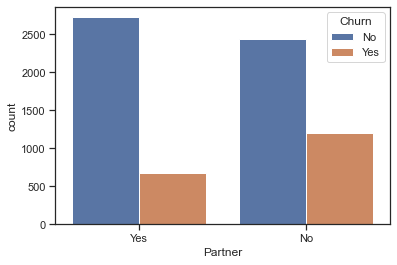

In [210]:
sns.countplot(x='Partner', hue='Churn', data=df)
plt.show()

less likely to churn if there is partner

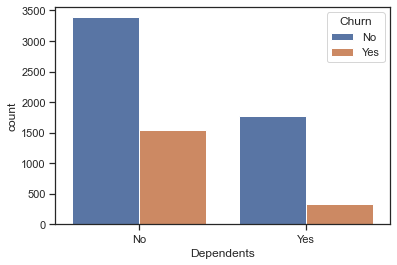

In [214]:
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.show()

less likely to churn if there is dependents

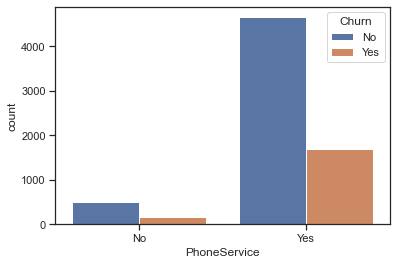

In [215]:
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.show()

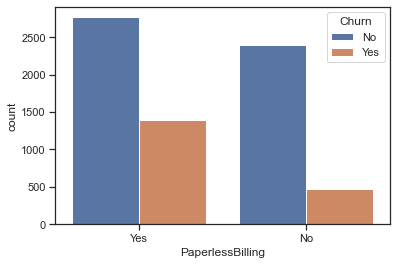

In [216]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.show()

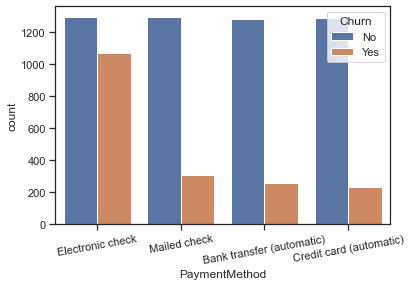

In [221]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=10)
plt.show()

Churners are more whose payment methods are by means of Electronic check.

In [228]:
# For modelling we need to convert Target variable to binary
# Discreet value integer encoder
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [230]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_category
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [233]:
# Converting all categoric variable to numeric
df_dummies= pd.get_dummies(df)
df_dummies.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_category_1 - 12,tenure_category_13 - 24,tenure_category_25 - 36,tenure_category_37 - 48,tenure_category_49 - 60,tenure_category_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0


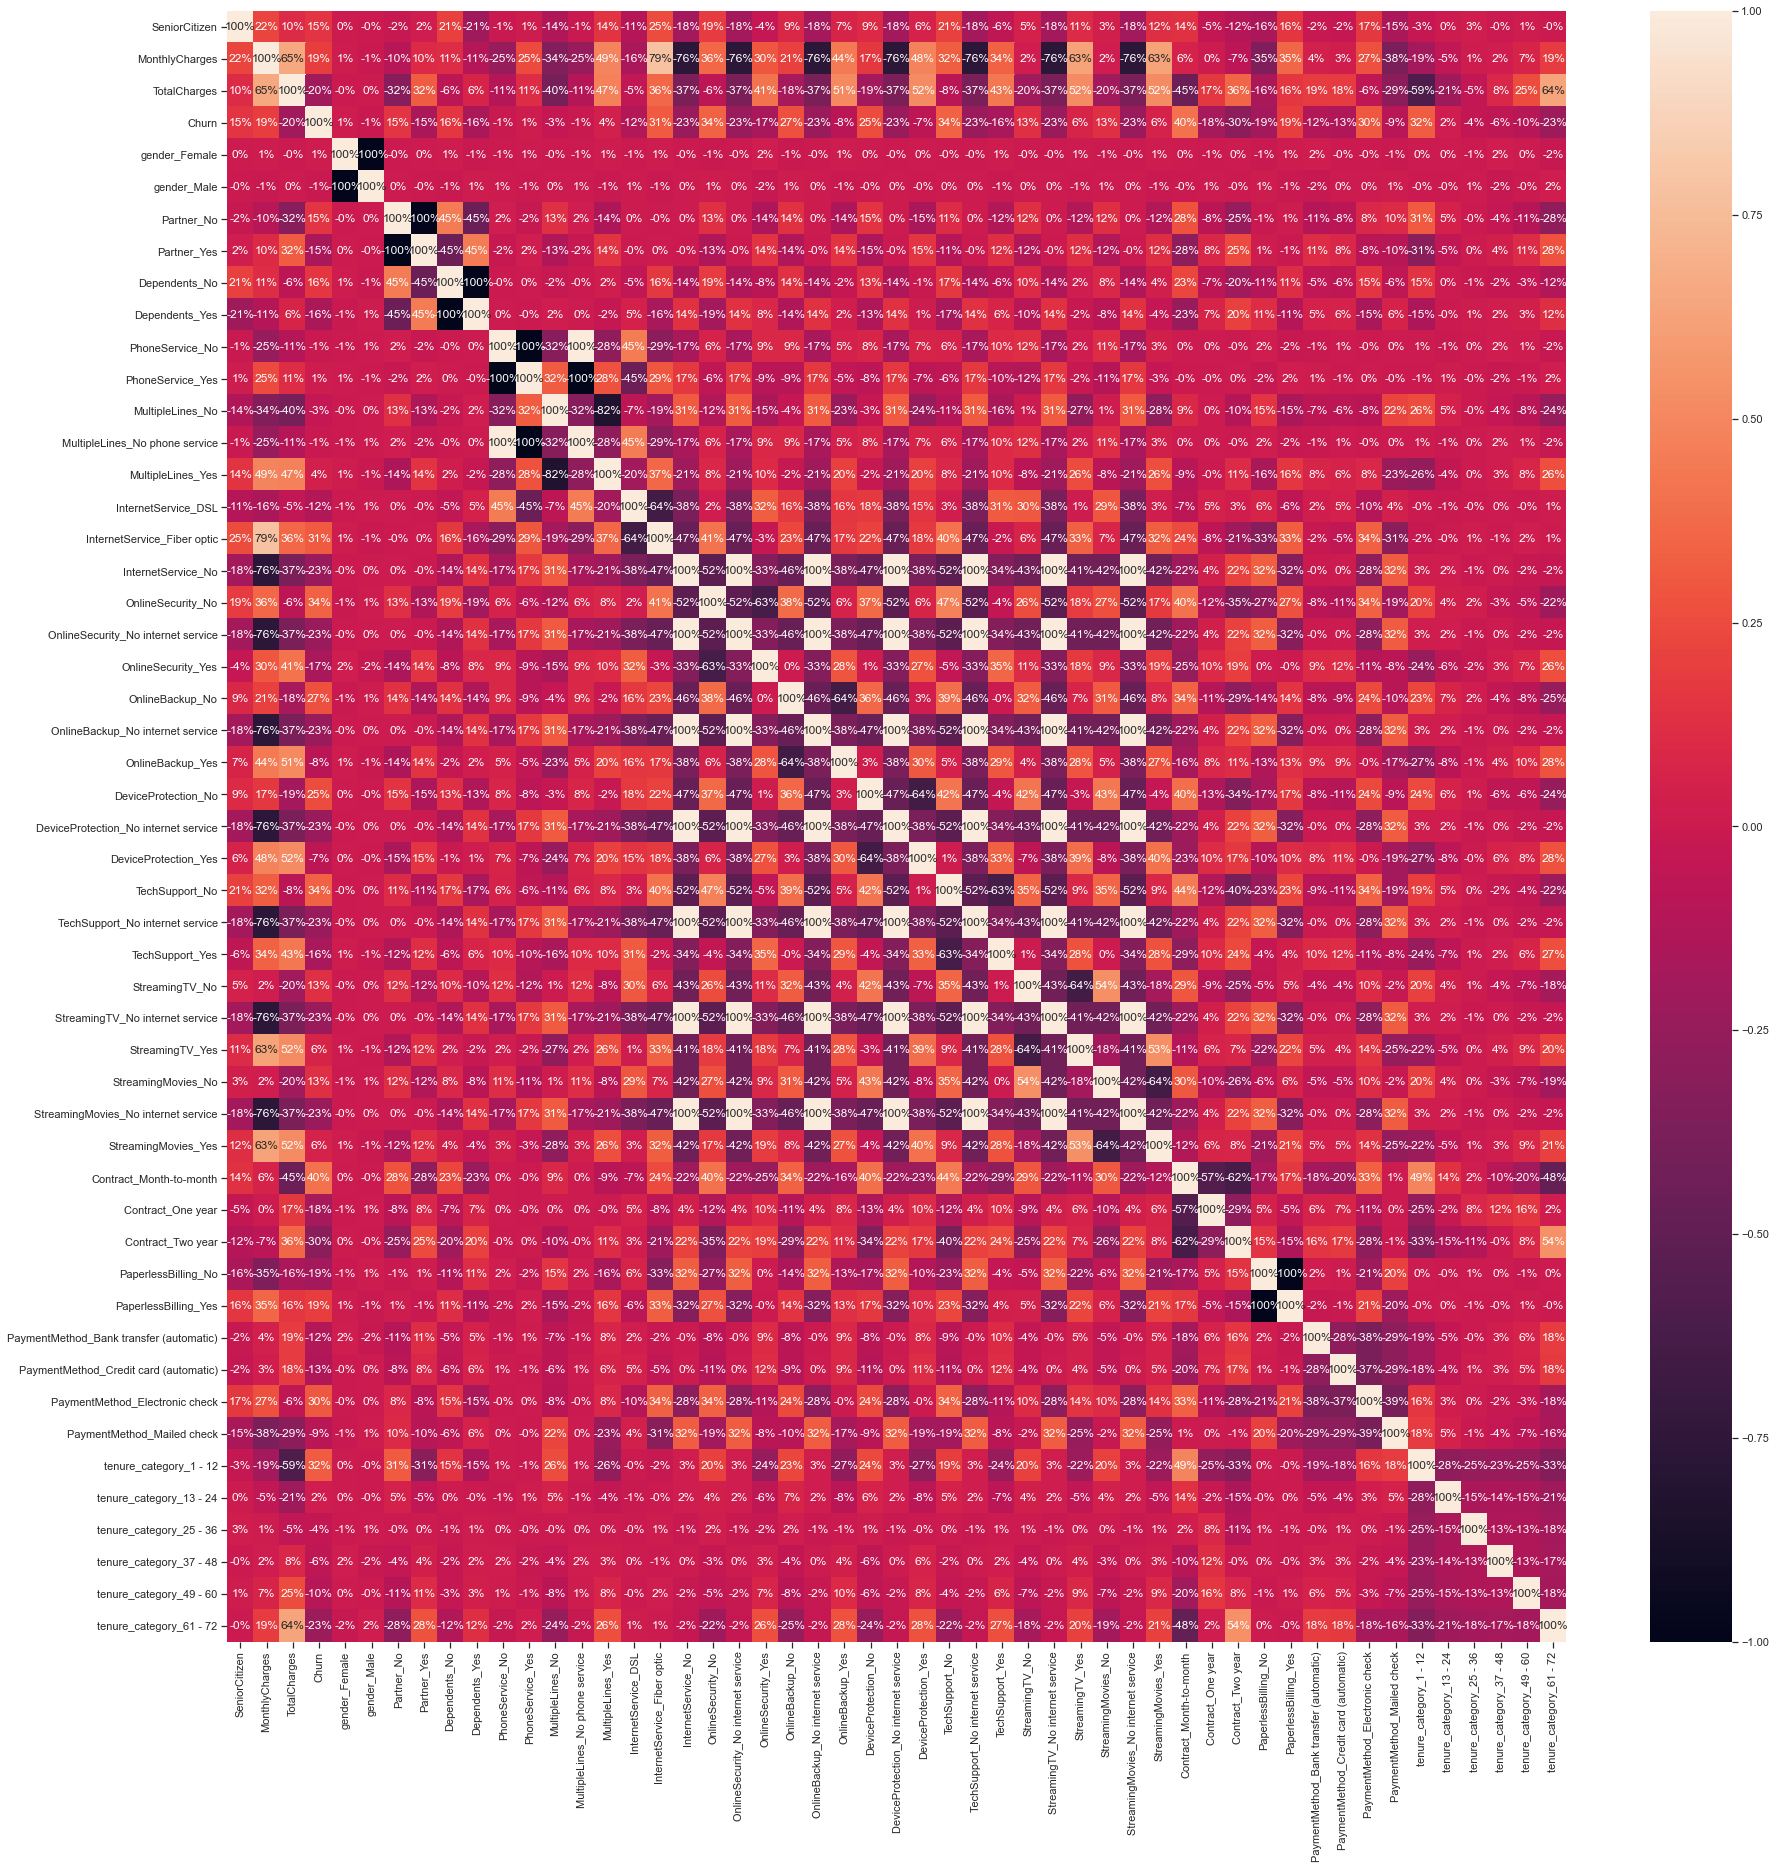

In [262]:
plt.figure(figsize=(30,30))
sns.heatmap(df_dummies.corr(),annot=True, fmt='.0%')
plt.show()

### MODELLING

In [245]:
# Creating dependent and independent variable.
y= df['Churn']
x= df.drop('Churn', axis=1)

In [247]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.22,random_state=1)

**DECISIONTREE CLASSIFIER**

In [248]:
dtc= DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6,min_samples_leaf=8)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Cofusion Matrix:",confusion_matrix(y_test,preddtc))
print("Classification Report:",classification_report(y_test,preddtc))
print("Accuracy Score:",accuracy_score(y_test,preddtc))

Cofusion Matrix: [[1045   93]
 [ 227  183]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1138
           1       0.66      0.45      0.53       410

    accuracy                           0.79      1548
   macro avg       0.74      0.68      0.70      1548
weighted avg       0.78      0.79      0.78      1548

Accuracy Score: 0.7932816537467701


In [251]:
# Cross Validating DTC
scr3= cross_val_score( dtc,x,y, cv=10)
print("Cross Validated score for DTC is:",scr3.mean())

Cross Validated score for DTC is: 0.7923782409802147


**RANDOMFOREST CLASSIFIER**

In [253]:
rfc= RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100,max_depth=6,min_samples_leaf=8)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train) #Accuracy score on train data
predrfc= rfc.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predrfc))
print("Classification Report:",classification_report(y_test,predrfc))
print("Accuracy score:",accuracy_score(y_test, predrfc))

Confusion Matrix: [[1061   77]
 [ 233  177]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1138
           1       0.70      0.43      0.53       410

    accuracy                           0.80      1548
   macro avg       0.76      0.68      0.70      1548
weighted avg       0.79      0.80      0.78      1548

Accuracy score: 0.7997416020671835


In [254]:
# Cross Validated score for RFC.
scr2= cross_val_score( rfc,x,y, cv=10)
print("Cross Validated score for RFC is:",scr2.mean())

Cross Validated score for RFC is: 0.7973550853485064


**LOGISTIC REGRESSION**

In [255]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train) #Accuracy score on train data
predlr= lr.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predlr))
print("Classification Report:",classification_report(y_test,predlr))
print("Accuracy score:",accuracy_score(y_test, predlr))

Confusion Matrix: [[1033  105]
 [ 202  208]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1138
           1       0.66      0.51      0.58       410

    accuracy                           0.80      1548
   macro avg       0.75      0.71      0.72      1548
weighted avg       0.79      0.80      0.79      1548

Accuracy score: 0.8016795865633075


In [256]:
# Cross Validated score for Logistic Regression
scr1= cross_val_score( lr,x,y, cv=10)
print("Cross Validated score for LR is:",scr1.mean())

Cross Validated score for LR is: 0.8013366012543643


**We get best result with Logistic Regression.**

###  SAVING THE BEST MODEL

In [257]:
import pickle
# save the model to disk
filename = 'finalmodel.pkl'
pickle.dump(rfc,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])